<a href="https://colab.research.google.com/github/ajag408/PokerClass/blob/main/preprocessing_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#use this to mount your drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#  %cd into /content/drive/Shared\ drives/255Project/PokerClass   (u have to use % in front of command)
%cd  /content/drive/Shared\ drives/255Project/PokerClass


#when saving changes, click on File -> Save a copy in GitHub.  Repo is "swetha1695/PokerClassification" and branch is "main"

/content/drive/Shared drives/255Project/PokerClass


In [ ]:
!pwd

/content/drive/Shared drives/255Project/PokerClass


In [ ]:
#proposing switching training and test sets, since test is way larger
import numpy as np
import pandas as pd

train = pd.read_csv('./Data/poker-hand-testing.data', delimiter=",")
train.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
#print(train)
train.head()


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0


In [ ]:
test = pd.read_csv('./Data/poker-hand-training-true.data', delimiter=",")
test.columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
#print(test)
test.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,2,11,2,13,2,10,2,12,2,1,9
1,3,12,3,11,3,13,3,10,3,1,9
2,4,10,4,11,4,1,4,13,4,12,9
3,4,1,4,13,4,12,4,11,4,10,9
4,1,2,1,4,1,5,1,3,1,6,8


In [ ]:
labels = pd.DataFrame()

In [ ]:
train.drop(['CLASS'], axis=1)
labels = train['CLASS']

In [ ]:
#preprocessing

# check missing values on the training set

train.isnull().any().any()



False

In [ ]:

# check missing values on the testing set
test.isnull().any().any()

False

In [ ]:
#check if any attributes have zero variance across instances (same value in all samples, these should therefore
#be considered meaningless)

from sklearn import feature_selection
print("training")
print(train.shape)
sel = feature_selection.VarianceThreshold()
train_variance = sel.fit_transform(train)

train = pd.DataFrame(train_variance)
print(train.shape)

print('\n')
print("testing")
print(test.shape)

test_variance = sel.fit_transform(test)

test = pd.DataFrame(test_variance)
print(test.shape)



training
(999999, 11)
(999999, 11)


testing
(25009, 11)
(25009, 11)


In [ ]:
# correlation of features to image class
corr_matrix = train.corr().abs()
print(corr_matrix[10].sort_values(ascending=False))

10    1.000000
1     0.003876
7     0.003010
5     0.002482
3     0.001712
9     0.001604
8     0.001515
4     0.001194
6     0.001157
2     0.000196
0     0.000030
Name: 10, dtype: float64


All features seem to have very low corelation to target

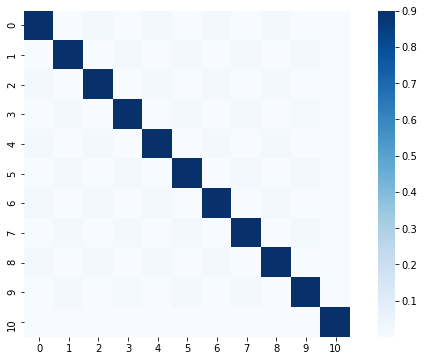

In [ ]:
#visualize correlation
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = train.corr().abs()
plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, vmax=0.9, cmap="Blues", square=True)


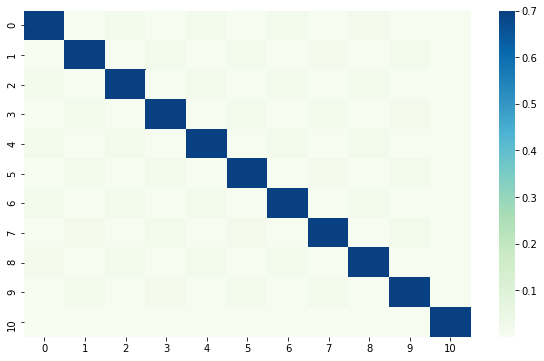

In [ ]:
plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix,vmax = 0.7,cmap = "GnBu")

In [ ]:
#check distribution of data

X_train = train.iloc[:,:10].copy()
X_test = test.iloc[:,:10].copy()

for col in X_train:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(X_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(X_train[col].kurt())  
         )

              0 Skewness: -0.00     Kurtosis: -01.36
              1 Skewness: 00.00     Kurtosis: -01.22
              2 Skewness: -0.00     Kurtosis: -01.36
              3 Skewness: -0.00     Kurtosis: -01.22
              4 Skewness: -0.00     Kurtosis: -01.36
              5 Skewness: -0.00     Kurtosis: -01.21
              6 Skewness: -0.00     Kurtosis: -01.36
              7 Skewness: -0.00     Kurtosis: -01.21
              8 Skewness: 00.00     Kurtosis: -01.36
              9 Skewness: 00.00     Kurtosis: -01.21


In [ ]:
#using StandardScaler for standardization since distribution seems approximately normal

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))

for col in X_train:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(X_train[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(X_train[col].kurt())  
         )

              0 Skewness: -0.00     Kurtosis: -01.36
              1 Skewness: 00.00     Kurtosis: -01.22
              2 Skewness: -0.00     Kurtosis: -01.36
              3 Skewness: -0.00     Kurtosis: -01.22
              4 Skewness: -0.00     Kurtosis: -01.36
              5 Skewness: -0.00     Kurtosis: -01.21
              6 Skewness: -0.00     Kurtosis: -01.36
              7 Skewness: -0.00     Kurtosis: -01.21
              8 Skewness: 00.00     Kurtosis: -01.36
              9 Skewness: 00.00     Kurtosis: -01.21


In [ ]:
#Smote for fixing data imbalance 
from imblearn.over_sampling import SMOTE
def balance_data(training_data, training_classes):
  sc = SMOTE(sampling_strategy='minority', random_state=101,k_neighbors=1,kind="regular")
  training_data = np.array(training_data)
  training_classes = np.array(training_classes)
  X_balanced, y_balanced = sc.fit_sample(training_data, training_classes)
  return X_balanced, y_balanced 

In [ ]:
train , labels = balance_data(train, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#we balance the training data by oversampling the minority data samples 
train.shape

(1501204, 11)